In [1]:
data <- read.csv("new_chr13_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
129784,chr13_3000100,3000000,3,9,9,64.285714,32.142857
58497,chr13_3000100,3000000,2,3,10,21.428571,35.714286
1,chr13_3000100,3000000,1,2,9,14.285714,32.142857
129785,chr13_3002000,3001900,3,47,69,43.518518,47.916667
58498,chr13_3002000,3001900,2,56,62,51.851852,43.055556
2,chr13_3002000,3001900,1,5,13,4.629630,9.027778
129786,chr13_3004200,3004100,3,160,255,76.190476,74.561404
58499,chr13_3004200,3004100,2,33,71,15.714286,20.760234
3,chr13_3004200,3004100,1,17,16,8.095238,4.678363
129787,chr13_3005600,3005500,3,203,317,76.315789,82.337662


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
25098,chr13_3000100,3000000,9,3,2
25114,chr13_3002000,3001900,47,56,5
25125,chr13_3004200,3004100,160,33,17
25135,chr13_3005600,3005500,203,52,11
25143,chr13_3007300,3007200,117,3,0
25145,chr13_3007500,3007400,77,0,0
25162,chr13_3009200,3009100,31,17,3
25164,chr13_3009400,3009300,144,18,14
25165,chr13_3009500,3009400,95,13,15
25202,chr13_3014100,3014000,96,25,23


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 76587"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
25098,chr13_3000100,3000000,9,3,2,0
25114,chr13_3002000,3001900,47,56,5,1900
25125,chr13_3004200,3004100,160,33,17,2200
25135,chr13_3005600,3005500,203,52,11,1400
25143,chr13_3007300,3007200,117,3,0,1700
25145,chr13_3007500,3007400,77,0,0,200
25162,chr13_3009200,3009100,31,17,3,1700
25164,chr13_3009400,3009300,144,18,14,200
25165,chr13_3009500,3009400,95,13,15,100
25202,chr13_3014100,3014000,96,25,23,4600


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
25098,chr13_3000100,3000000,9,3,2,0
25165,chr13_3009500,3009400,95,13,15,100
25418,chr13_3041600,3041500,23,0,0,100
25420,chr13_3041700,3041600,43,28,5,100
25469,chr13_3049700,3049600,47,21,7,100
25470,chr13_3049800,3049700,76,22,1,100


,binID,start,high,medium,low,dist
25165,chr13_3009500,3009400,95,13,15,100
25418,chr13_3041600,3041500,23,0,0,100
25420,chr13_3041700,3041600,43,28,5,100
25469,chr13_3049700,3049600,47,21,7,100
25470,chr13_3049800,3049700,76,22,1,100
25492,chr13_3052200,3052100,126,56,2,100


[1] 10659

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3009300   3009400   3041400   3041500   3041600   3049500   3049600
    [8]   3049700   3052000   3052100   3053800   3053900   3054000   3062600
   [15]   3062700   3066600   3066700   3084700   3084800   3086300   3086400
   [22]   3086500   3086600   3086700   3086800   3086900   3087200   3087300
   [29]   3087400   3092800   3092900   3097900   3098000   3101300   3101400
   [36]   3101900   3102000   3102100   3103500   3103600   3110300   3110400
   [43]   3139400   3139500   3141000   3141100   3161600   3161700   3173100
   [50]   3173200   3174400   3174500   3174600   3174700   3175100   3175200
   [57]   3175300   3175400   3176600   3176700   3178500   3178600   3178700
   [64]   3180300   3180400   3180500   3180800   3180900   3191300   3191400
   [71]   3198200   3198300   3198900   3199000   3201700   3201800   3201900
   [78]   3202200   3202300   3210900   3211000   3211500   3211600   3211700
   [85]   3222100   3222200   3231400   3231500   3231600   3231700   3232000
   [92]   3232100   3235700   3235800   3235900   3261400   3261500   3279600
   [99]   3279700   3279800   3280100   3280200   3283900   3284000   3287300
  [106]   3287400   3290700   3290800   3297700   3297800   3299100   3299200
  [113]   3299300   3303400   3303500   3321700   3321800   3323200   3323300
  [120]   3323500   3323600   3323700   3328200   3328300   3330000   3330100
  [127]   3338300   3338400   3338500   3338900   3339000   3349200   3349300
  [134]   3350000   3350100   3350200   3350400   3350500   3351300   3351400
  [141]   3359000   3359100   3379900   3380000   3380100   3381400   3381500
  [148]   3386700   3386800   3388000   3388100   3390500   3390600   3393000
  [155]   3393100   3406400   3406500   3414400   3414500   3420500   3420600
  [162]   3420700   3420800   3424200   3424300   3424400   3426700   3426800
  [169]   3427200   3427300   3429600   3429700   3429800   3432600   3432700
  [176]   3432800   3457600   3457700   3499900   3500000   3500100   3508200
  [183]   3508300   3555800   3555900   3574200   3574300   3576600   3576700
  [190]   3598000   3598100   3615500   3615600   3616300   3616400   3633200
  [197]   3633300   3665700   3665800   3690600   3690700   3709200   3709300
  [204]   3729500   3729600   3737200   3737300   3738700   3738800   3803200
  [211]   3803300   3823100   3823200   3866200   3866300   3881900   3882000
  [218]   3883800   3883900   3884100   3884200   3889500   3889600   3899000
  [225]   3899100   3900400   3900500   3901200   3901300   3902300   3902400
  [232]   3902500   3902600   3902700   3910700   3910800   3926000   3926100
  [239]   3947500   3947600   3952600   3952700   3959600   3959700   3987500
  [246]   3987600   3990700   3990800   3993300   3993400   4021600   4021700
  [253]   4058600   4058700   4075300   4075400   4075900   4076000   4076100
  [260]   4127800   4127900   4129000   4129100   4169600   4169700   4169800
  [267]   4199000   4199100   4211300   4211400   4326000   4326100   4355200
  [274]   4355300   4376800   4376900   4382200   4382300   4388200   4388300
  [281]   4410500   4410600   4449300   4449400   4454500   4454600   4463500
  [288]   4463600   4464200   4464300   4563500   4563600   4567600   4567700
  [295]   4567800   4588600   4588700   4597300   4597400   4606100   4606200
  [302]   4634500   4634600   4662900   4663000   4741800   4741900   4765100
  [309]   4765200   4800600   4800700   4808500   4808600   4829500   4829600
  [316]   4829700   4829800   4829900   4832700   4832800   4874100   4874200
  [323]   4877000   4877100   4894100   4894200   4903100   4903200   4903300
  [330]   4903400   4904300   4904400   4904500   4942600   4942700   4981100
  [337]   4981200   4982200   4982300   4983700   4983800   4990000   4990100
  [344]   5004100   5004200   5012500   5012600   5027700   5027800   5028400
  [351]   5028500   5030300   5030400   5046500   5046600   5063700   5063800
  [358]   5119600   511970

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
25164,chr13_3009400,3009300,144,18,14
25165,chr13_3009500,3009400,95,13,15
25417,chr13_3041500,3041400,115,14,3
25418,chr13_3041600,3041500,23,0,0
25420,chr13_3041700,3041600,43,28,5
25468,chr13_3049600,3049500,97,22,0
25469,chr13_3049700,3049600,47,21,7
25470,chr13_3049800,3049700,76,22,1
25490,chr13_3052100,3052000,95,0,0
25492,chr13_3052200,3052100,126,56,2


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
25165,chr13_3009500,3009400,0.462846312355491
25417,chr13_3041500,3041400,0
25418,chr13_3041600,3041500,0.189472743039148
25420,chr13_3041700,3041600,0.000558569459662453
25468,chr13_3049600,3049500,0
25469,chr13_3049700,3049600,0.000503925709287297


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
25165,chr13_3009500,3009400,0.462846312355491
25418,chr13_3041600,3041500,0.189472743039148
25596,chr13_3066800,3066700,0.28751563967523
25745,chr13_3084900,3084800,0.641355397991711
25760,chr13_3086800,3086700,0.0905581159396171
25764,chr13_3087400,3087300,0.345803369439049


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3009300   3009400   3041400   3041500   3066600   3066700   3084700
   [8]   3084800   3086600   3086700   3087200   3087300   3097900   3098000
  [15]   3101300   3101400   3173100   3173200   3174500   3174600   3174700
  [22]   3175200   3175300   3178500   3178600   3178700   3180300   3180400
  [29]   3191300   3191400   3201700   3201800   3201900   3202200   3202300
  [36]   3211600   3211700   3235700   3235800   3235900   3279600   3279700
  [43]   3279800   3280100   3280200   3283900   3284000   3328200   3328300
  [50]   3330000   3330100   3338300   3338400   3338900   3339000   3349200
  [57]   3349300   3350400   3350500   3351300   3351400   3379900   3380000
  [64]   3380100   3390500   3390600   3420500   3420600   3420700   3420800
  [71]   3424200   3424300   3424400   3429600   3429700   3429800   3432700
  [78]   3432800   3457600   3457700   3499900   3500000   3508200   3508300
  [85]   3555800   3555900   3576600   3576700   3598000   3598100   3615500
  [92]   3615600   3616300   3616400   3690600   3690700   3729500   3729600
  [99]   3737200   3737300   3738700   3738800   3866200   3866300   3881900
 [106]   3882000   3884100   3884200   3899000   3899100   3901200   3901300
 [113]   3902300   3902400   3902500   3902600   3902700   3926000   3926100
 [120]   3959600   3959700   3990700   3990800   4021600   4021700   4058600
 [127]   4058700   4075300   4075400   4075900   4076000   4076100   4199000
 [134]   4199100   4326000   4326100   4355200   4355300   4388200   4388300
 [141]   4449300   4449400   4454500   4454600   4464200   4464300   4567600
 [148]   4567700   4588600   4588700   4597300   4597400   4606100   4606200
 [155]   4662900   4663000   4765100   4765200   4800600   4800700   4829600
 [162]   4829700   4829800   4829900   4832700   4832800   4874100   4874200
 [169]   4894100   4894200   4903100   4903200   4903300   4903400   4904400
 [176]   4904500   4942600   4942700   4983700   4983800   5027700   5027800
 [183]   5028400   5028500   5030300   5030400   5046500   5046600   5119600
 [190]   5119700   5146500   5146600   5149100   5149200   5195100   5195200
 [197]   5196000   5196100   5196200   5196800   5196900   5197000   5197100
 [204]   5199400   5199500   5199600   5200200   5200300   5215300   5215400
 [211]   5244900   5245000   5245700   5245800   5278800   5278900   5624800
 [218]   5624900   5713300   5713400   5762600   5762700   5762800   5841600
 [225]   5841700   5861100   5861200   5867100   5867200   5983700   5983800
 [232]   5984500   5984600   6039000   6039100   6053900   6054000   6066800
 [239]   6066900   6103800   6103900   6155900   6156000   6183000   6183100
 [246]   6222800   6222900   6226000   6226100   6238600   6238700   6262100
 [253]   6262200   6268900   6269000   6295800   6295900   6400700   6400800
 [260]   6449400   6449500   6457500   6457600   6490000   6490100   6494600
 [267]   6494700   6494800   6528100   6528200   6528300   6554500   6554600
 [274]   6564800   6564900   6565700   6565800   6568400   6568500   6568600
 [281]   6570900   6571000   6577000   6577100   6597800   6597900   6605500
 [288]   6605600   6663900   6664000   6742800   6742900   6794900   6795000
 [295]   6807700   6807800   6813000   6813100   6826100   6826200   6890400
 [302]   6890500   6913800   6913900   6917600   6917700   6939400   6939500
 [309]   6988000   6988100   7131200   7131300   7132200   7132300   7157600
 [316]   7157700   7228100   7228200   7275500   7275600   7285600   7285700
 [323]   7285800   7339500   7339600   7388800   7388900   7480100   7480200
 [330]   7482300   7482400   7543100   7543200   7590200   7590300   7602300
 [337]   7602400   7603500   7603600   7630600   7630700   7671100   7671200
 [344]   7671500   7671600   7695500   7695600   7796500   7796600   7822700
 [351]   7822800   7830200   7830300   7930000   7930100   8022500   8022600
 [358]   8023100   8023200   8030700   8030800   8031400   8031500   8119300

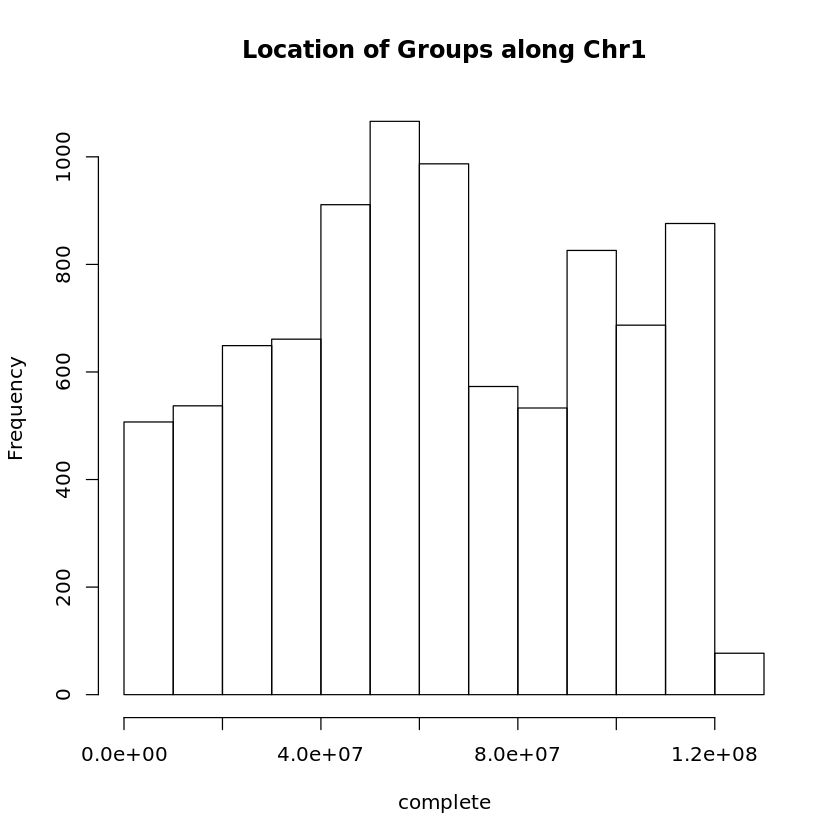

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
25164,chr13_3009400,3009300,144,18,14
25165,chr13_3009500,3009400,95,13,15
25417,chr13_3041500,3041400,115,14,3
25418,chr13_3041600,3041500,23,0,0
25595,chr13_3066700,3066600,72,27,5
25596,chr13_3066800,3066700,83,44,3
25744,chr13_3084800,3084700,48,8,2
25745,chr13_3084900,3084800,69,13,1
25758,chr13_3086700,3086600,57,44,9
25760,chr13_3086800,3086700,42,15,4


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 8890"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr13_3098100,3098000,131,30,9
110,gap 7,0,100,100,100
22,chr13_3101400,3101300,43,11,0
23,chr13_3101500,3101400,45,11,0
112,gap 8,0,100,100,100
25,chr13_3173200,3173100,29,10,0
26,chr13_3173300,3173200,126,46,3
113,gap 9,0,100,100,100
28,chr13_3174600,3174500,49,29,4
29,chr13_3174700,3174600,10,1,0


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
25164,chr13_3009400,3009300,144,18,14
2,chr13_3009500,3009400,95,13,15
1,gap 1,0,100,100,100
4,chr13_3041500,3041400,115,14,3
5,chr13_3041600,3041500,23,0,0
11,gap 2,0,100,100,100


,binID,start,high,medium,low
14775,gap 4149,0,100,100,100
130351,chr13_120290600,120290500,2,2,0
130361,chr13_120290700,120290600,7,0,1
130371,chr13_120290800,120290700,17,6,3
130381,chr13_120290900,120290800,8,0,2
130391,chr13_120291000,120290900,16,11,3


In [20]:
write.csv(part, "chr13_A_group.csv")

[1] "Total Number of groups: 4150"

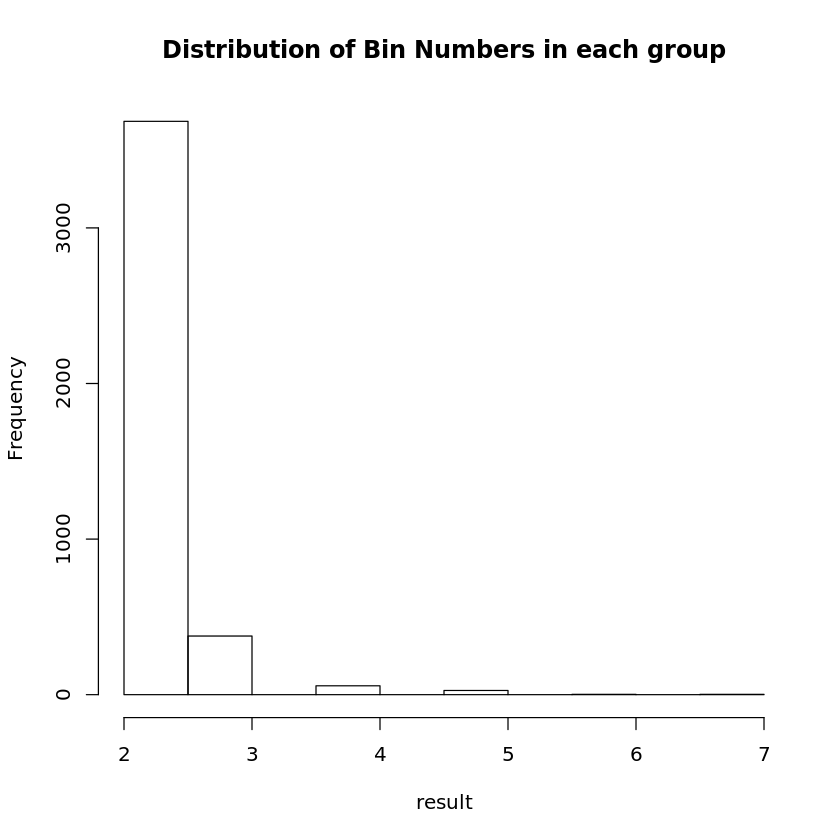

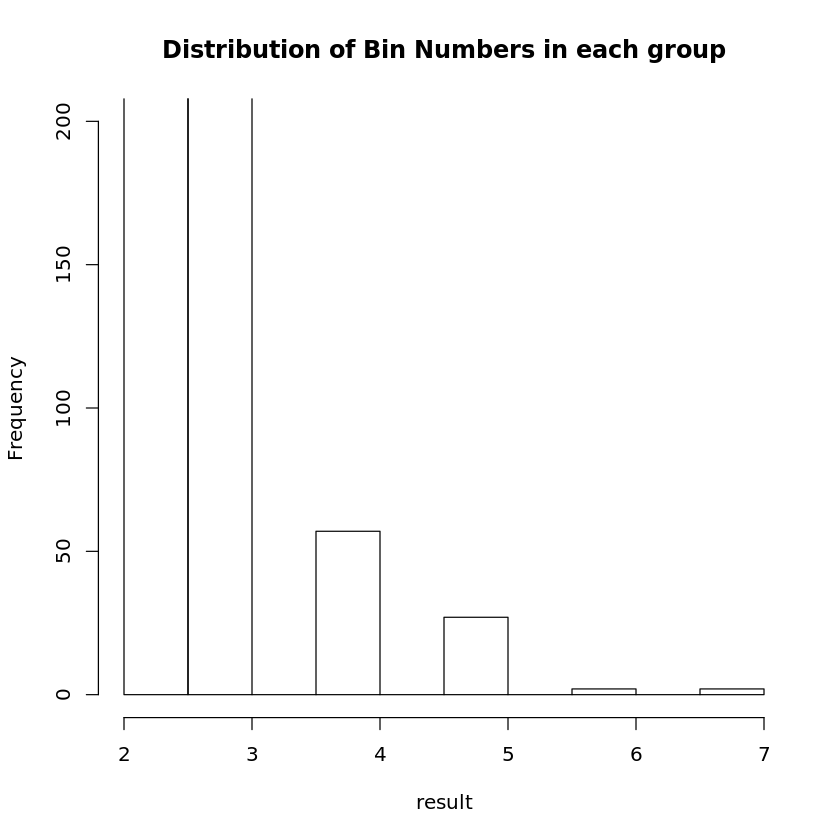

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")